<a href="https://colab.research.google.com/github/AnnAnsas/Pet-Project/blob/main/Adipocit_Model_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from scipy.integrate import odeint

In [ ]:
def FoodGetter(actual_start, actual_end, width, height): #gets two values: one for width and another for height
  return np.append(np.append( np.zeros(actual_start), np.full((1,width), height)),  np.zeros(actual_end - actual_start - width))

In [ ]:
 #SORTED array of t_starts, arrays of widths, heigths and lags in the corresponding order. All of the arrays should have the same length
def FoodTracker(t_starts, widths, heigths, lags):
  end = len(t_starts)-1
  actual_end = t_starts[end] + widths[end] + lags[end]+1
  result = np.zeros(t_starts[end] + widths[end] + lags[end]+1)
  times =  np.arange(0, actual_end, 1)
  for i in range(len(t_starts)):
    cur_food = FoodGetter(t_starts[i] + lags[i], actual_end, widths[i], heigths[i])
    result += cur_food
  return (result, times)

In [ ]:
res, tim = FoodTracker([1, 4, 5, 10, 20], [3, 3,2, 6, 1], [2, 4, 6, 7, 1], [1,2,1,1,1])

In [ ]:
from matplotlib import pyplot as plt 
import numpy as np

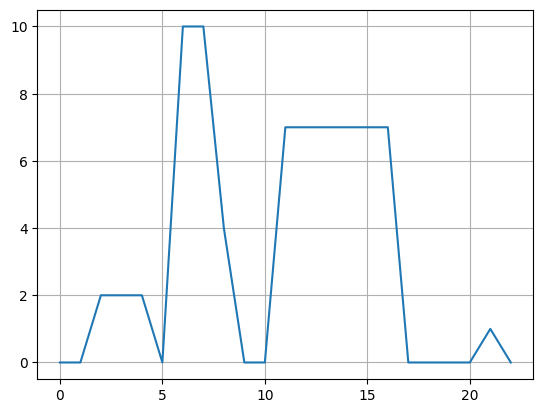

In [ ]:
plt.plot(res)
plt.grid()
plt.show()

In [ ]:
def Rele(parameter, alpha, betta, gamma, delta):
  res = None
  if (parameter < alpha):
    return gamma
  elif(parameter > betta):
    return delta
  return (delta - gamma) / (betta - alpha) * parameter + (gamma * betta - delta * alpha)/(betta - alpha)

In [ ]:
def Adipocit(y, t, a_0,a_3,a_5,a_12,a_13,a_14,a_15,a_16,a_17,a_18,a_21,a_22,a_23,a_24,a_25,a_27,a_sp,alpha, betta,gamma,delta,alpha1,alpha2,alpha4,alpha7,alpha8,alpha9,alpha10,alpha11,
             alpha19_1,alpha19_2,alpha20,alpha26,alpha28,betta1,betta2,betta4,betta7,betta8,betta9,betta10,betta11,betta19_1,betta19_2,
             betta20,betta26,betta28,gamma1,gamma2,gamma4,gamma7,gamma8,gamma9,gamma10,gamma11,gamma19_1,gamma19_2,gamma20,gamma26,gamma28,
             delta1,delta2,delta4,delta7,delta8,delta9,delta10,delta11,delta19_1,delta19_2,delta20,delta26,delta28,
             FFA_plasma_local,LD,FFA_global,J_carb,J_fat,J_prot,CL):
    Insulin, Gluc_blood,AA_food,TAG_blood, FFA_loc,FA_CoA_a, Gly3P_a, TAG_a, LD_a,FFA_a,G3P_a,G6P_a,GG_a,Pyr_a,Lac_a,Hn_c_a,AA_a,Ac_CoA_a, Mal_CoA_a,Cytr_a,OAA_a ,CO_2_a,Hnf_m_a, ATP_a, NADPH_a= y
    A_0 = a_0
    A_1 = Rele(Insulin, alpha1, betta1, gamma1, delta1) * FFA_plasma_local
    A_2 = Rele(Gluc_blood, alpha2, betta2, gamma2, delta2) * FA_CoA_a * Gly3P_a
    A_3 = a_3 * TAG_a
    A_4= Rele(Insulin,alpha4,betta4,gamma4,delta4)*LD**(2/3)
    A_5 = a_5*(FFA_loc - FFA_global)
    A_6 = 0
    A_7 = Rele(Insulin,alpha7,betta7,gamma7,delta7)*Gluc_blood
    A_8 = Rele(G6P_a, alpha8, betta8, gamma8, delta8)
    A_9= Rele(Insulin,alpha9,betta9,gamma9,delta9)*G6P_a
    A_10= Rele(Insulin,alpha10,betta10,gamma10,delta10)*G6P_a
    A_11= Rele( Gluc_blood,alpha11,betta11,gamma11,delta11)*GG_a 
    A_12= a_12*G6P_a
    A_13=a_13*G3P_a
    A_14=a_14*AA_food
    A_15=a_15*AA_food
    A_16=a_16*AA_food
    A_17=a_17*Hn_c_a
    A_18= a_18*Lac_a
    A_19= Rele(Insulin,alpha19_1, betta19_1,gamma19_1,delta19_1)*Rele(Ac_CoA_a,alpha19_2,betta19_2,gamma19_2,delta19_2)* Pyr_a
    A_20= Rele(Cytr_a,alpha20,betta20,gamma20,delta20)*Ac_CoA_a
    A_21 = a_21 * Ac_CoA_a * OAA_a
    A_22 = a_22 * Cytr_a
    A_23 = a_23* Hnf_m_a
    A_24 = a_24 * OAA_a
    A_25 = a_25 * NADPH_a * Mal_CoA_a * Ac_CoA_a
    A_26= Rele(Insulin,alpha26,betta26,gamma26,delta26)*Pyr_a
    A_27 = a_27 * G3P_a
    A_28=Rele(Insulin,alpha28,betta28,gamma28,delta28)*AA_food
    A_carn = 0 #TODO 
    SP_a = a_sp * (FFA_loc - FFA_global)


    dInsulin = alpha*J_carb + betta*J_fat + gamma*J_prot - CL * Insulin
    dGluc_blood = J_carb - A_7 #-M_23 - H_19 + H_20
    dAA_food = J_prot - A_28 #-H_30 - M_20 + M_19
    dTAG_blood = J_fat - A_0  #- M_0 - H_0 + H_28 + H_30

    dFFA_loc = A_0 - A_1 - SP_a
    dFA_CoA_a = A_1 + A_6 - A_2 - A_carn
    dGly3P_a = A_27 - A_2
    dTAG_a = A_2 - A_3
    dLD_a = A_3 - A_4
    dFFA_a = 3*A_4 - A_5 - A_6 + A_25
    dG3P_a = 2*A_9 + A_12 + A_26 - A_13 - A_27
    dG6P_a = A_8 + A_11 - A_9 - A_10 -A_12
    dGG_a = A_10 - A_11
    dPyr_a = A_14 + A_13 + A_24 - A_19 - A_26 - A_17
    dLac_a = A_17 - A_18
    dHn_c_a = A_13 - A_17
    dAA_a = A_28 - A_14 - A_15 - A_16
    dAc_CoA_a = A_19 + A_15 - A_20 - A_21 - A_25
    dMal_CoA_a = A_20 - A_25
    dCytr_a= A_21 - A_22
    dOAA_a = A_16 + A_22 - A_21 - A_24
    dCO_2_a = A_22 + A_19
    dHnf_m_a = A_22 - A_23
    dATP_a = A_23 + A_13
    dNADPH_a = A_12 + A_24 - A_25


    dydt = [dInsulin,
            dGluc_blood,
            dAA_food,
            dTAG_blood,
            dFFA_loc,
            dFA_CoA_a,
            dGly3P_a,
            dTAG_a,
            dLD_a,
            dFFA_a,
            dG3P_a,
            dG6P_a,
            dGG_a,
            dPyr_a,
            dLac_a,
            dHn_c_a,
            dAA_a,
            dAc_CoA_a,
            dMal_CoA_a,
            dCytr_a,
            dOAA_a,
            dCO_2_a,
            dHnf_m_a,
            dATP_a,
            dNADPH_a
            ]
    return dydt

In [ ]:
t = np.linspace(0, 10, 1000)

In [ ]:
a_0 = 1
a_3 = 1
a_5 = 1
a_12 = 1
a_13 = 1
a_14 = 1
a_15 = 1
a_16 = 1
a_17 = 1
a_18 = 1
a_21 = 1
a_22 = 1
a_23 = 1
a_24 = 1
a_25 = 1
a_27 = 1
a_sp = 1
alpha = 1
betta = 2
gamma = 4
delta = 3
alpha1 = 1
alpha2 = 1
alpha4 = 1
alpha7 = 1
alpha8 = 1
alpha9 = 1
alpha10 = 1
alpha11 = 1
alpha19_1 = 1
alpha19_2 = 1
alpha20 = 1
alpha26 = 1
alpha28 = 1
betta1 = 2
betta2 = 2
betta4 = 2
betta7 = 2
betta8 = 2
betta9 = 2
betta10 = 2
betta11 = 2
betta19_1 = 2
betta19_2 = 2
betta20 = 2
betta26 = 2
betta28 = 2
gamma1 = 3
gamma2 = 3
gamma4 = 3
gamma7 = 3
gamma8 = 3
gamma9 = 3
gamma10 = 3
gamma11 = 3
gamma19_1 = 3
gamma19_2 = 3
gamma20 = 3
gamma26 = 3
gamma28 = 3
delta1 = 4
delta2 = 4
delta4 = 4
delta7 = 4
delta8 = 4
delta9 = 4
delta10 = 4
delta11 = 4
delta19_1 = 4
delta19_2 = 4
delta20 = 4
delta26 = 4
delta28 = 4
FFA_plasma_local = 1
LD = 1
FFA_global = 1
J_carb = 1
J_fat = 1
J_prot = 1
CL = 1

In [ ]:
#запустить программу с параметрами
params = [a_0,a_3,a_5,a_12,a_13,a_14,a_15,a_16,a_17,a_18,a_21,a_22,a_23,a_24,a_25,a_27,a_sp,alpha, betta,gamma,delta,alpha1,alpha2,alpha4,alpha7,alpha8,alpha9,alpha10,alpha11,
             alpha19_1,alpha19_2,alpha20,alpha26,alpha28,betta1,betta2,betta4,betta7,betta8,betta9,betta10,betta11,betta19_1,betta19_2,
             betta20,betta26,betta28,gamma1,gamma2,gamma4,gamma7,gamma8,gamma9,gamma10,gamma11,gamma19_1,gamma19_2,gamma20,gamma26,gamma28,
             delta1,delta2,delta4,delta7,delta8,delta9,delta10,delta11,delta19_1,delta19_2,delta20,delta26,delta28,
             FFA_plasma_local,LD,FFA_global,J_carb,J_fat,J_prot,CL]


In [ ]:
Insulin0 = 1
Gluc_blood0 = 1
AA_food0 = 1
TAG_blood0 = 1
FFA_loc0 = 1
FA_CoA_a0 = 1
Gly3P_a0 = 1
TAG_a0 = 1
LD_a0 = 1
FFA_a0 = 1
G3P_a0 = 1
G6P_a0 = 1
GG_a0 = 1
Pyr_a0 = 1
Lac_a0 = 1
Hn_c_a0 = 1
AA_a0 = 1
Ac_CoA_a0 = 1
Mal_CoA_a0 = 1
Cytr_a0 = 1
OAA_a0 = 1
CO_2_a0 = 1
Hnf_m_a0 = 1
ATP_a0 = 1
NADPH_a0 = 1 

In [ ]:
y0 = [Insulin0, Gluc_blood0,AA_food0,TAG_blood0, FFA_loc0,FA_CoA_a0, Gly3P_a0, TAG_a0, LD_a0,FFA_a0,G3P_a0,G6P_a0,GG_a0,Pyr_a0,Lac_a0,Hn_c_a0,AA_a0,Ac_CoA_a0, Mal_CoA_a0,Cytr_a0,OAA_a0 ,CO_2_a0,Hnf_m_a0, ATP_a0, NADPH_a0]

In [ ]:
sol = odeint(Adipocit, y0, t, tuple(params))

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
df = pd.DataFrame(np.c_[np.array(sol)], index = t, columns = ["Insulin0", "Gluc_blood0", "AA_food0","TAG_blood0",
                                                               "FFA_loc0","FA_CoA_a0", "Gly3P_a0", "TAG_a0", "LD_a0","FFA_a0","G3P_a0",
                                                               "G6P_a0","GG_a0","Pyr_a0","Lac_a0","Hn_c_a0","AA_a0","Ac_CoA_a0", 
                                                               "Mal_CoA_a0","Cytr_a0","OAA_a0","CO_2_a0","Hnf_m_a0", "ATP_a0", "NADPH_a0"] )
df.index.name = "time"
print(df.tail())

          Insulin0  Gluc_blood0  AA_food0  TAG_blood0  FFA_loc0  FA_CoA_a0  \
time                                                                         
9.95996   6.999716         0.25      0.25         1.0 -1.999854  12.058101   
9.96997   6.999719         0.25      0.25         1.0 -1.999855  12.070407   
9.97998   6.999722         0.25      0.25         1.0 -1.999857  12.082714   
9.98999   6.999725         0.25      0.25         1.0 -1.999858  12.095020   
10.00000  6.999728         0.25      0.25         1.0 -1.999860  12.107327   

          Gly3P_a0    TAG_a0      LD_a0      FFA_a0  ...   Hn_c_a0     AA_a0  \
time                                                 ...                       
9.95996   0.076591  2.774032 -11.832133  152.213706  ...  2.763598  3.618962   
9.96997   0.076512  2.773998 -11.844405  152.367305  ...  2.763590  3.621464   
9.97998   0.076434  2.773964 -11.856677  152.520902  ...  2.763581  3.623967   
9.98999   0.076355  2.773930 -11.868950  152.674499  

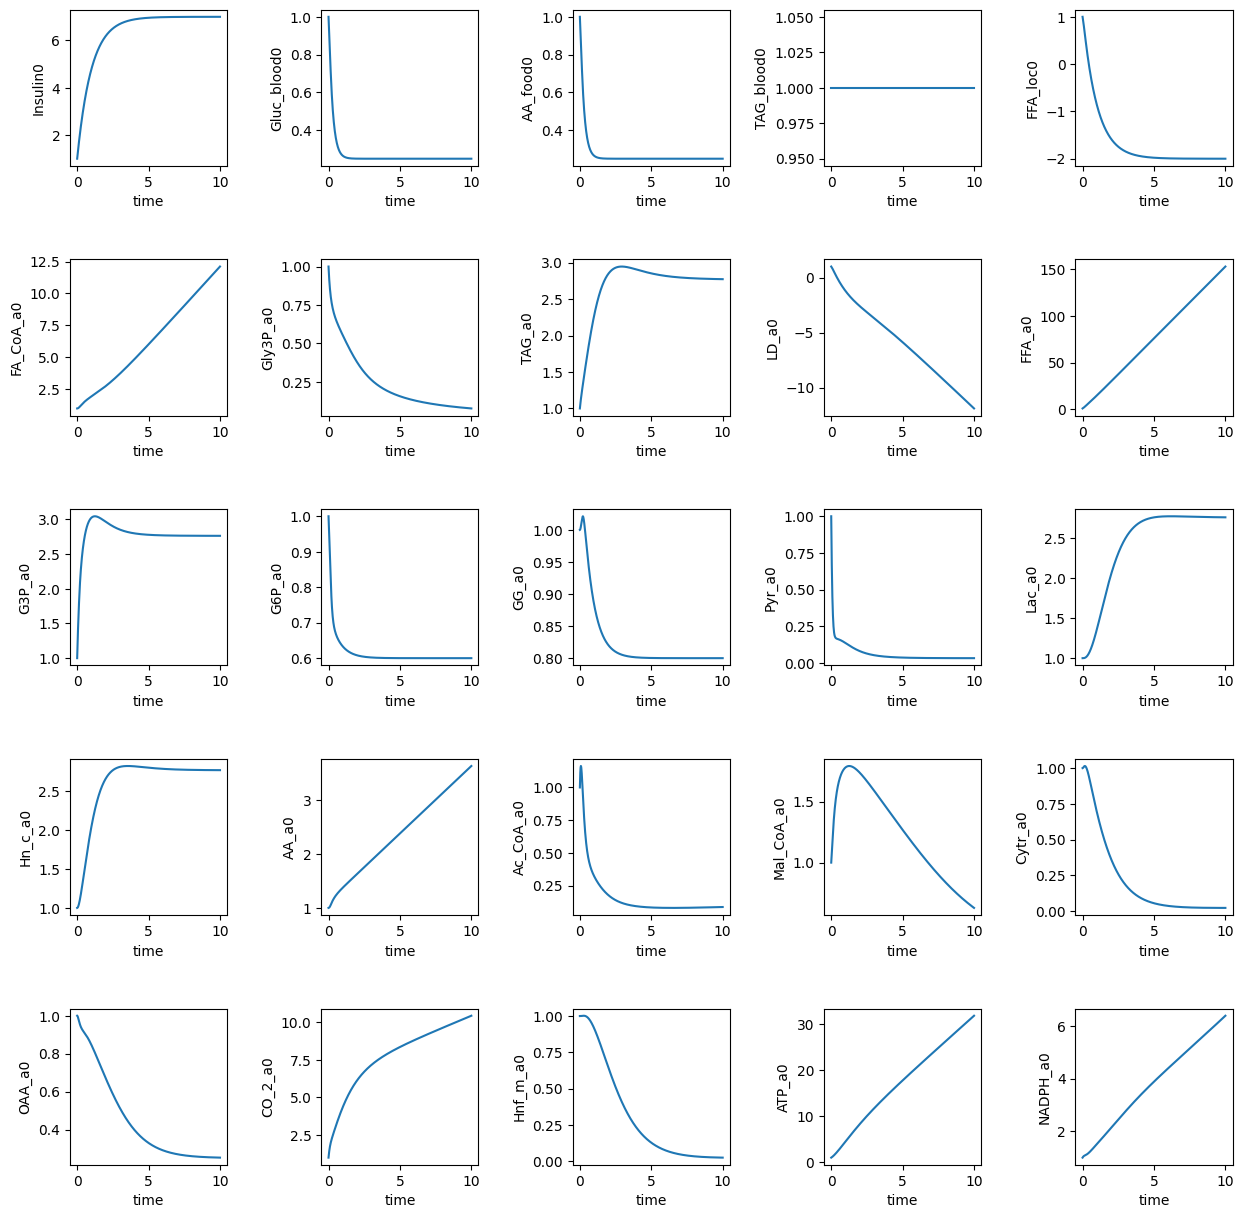

In [ ]:
plt.figure(figsize=(15, 15))
plt.subplots_adjust(hspace = 0.6, wspace = 0.6)
for i, col in enumerate(df):
  plt.subplot(5, 5, i+1)
  sns.lineplot(data = df, x = df.index, y = col)